<H1>Analiza dużych zbiorów danych - test zaliczeniowy</H1>
<p>Studia podyplomowe 2023/2024<br>
    Data: 26.05.2024
</p>

<H3>Student:</H3>
<p>Natalia Łach</p>

<h5>1. Proszę utworzyć przykładowy DataFrame w Spark. Schemat i dane proszę wprowadzić ręcznie. Zbiór powinien zawierać 5 wierszy i 3 kolumny. Co najmniej jedna kolumna powinna być typu String i jedna numeryczna. Nazwy kolumn i wprowadzone wartości mogą być dowolne.</h5>

In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=e0bc1e35df24f5fde00aa44e5fd5d7cd07f828b0695444d95009f47a799816d9
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [75]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkLanguages').getOrCreate()
columns = ["language","users_count", "ranking"]
data = [("Java", 2000, 2.0), ("Python", 1000, 4.0), ("Scala", 3000, 1.0), ("SQL", 1000, 7.0), ('C', 5000, 6.0)]
df = spark.createDataFrame(data, columns)
df.head(5)

[Row(language='Java', users_count=2000, ranking=2.0),
 Row(language='Python', users_count=1000, ranking=4.0),
 Row(language='Scala', users_count=3000, ranking=1.0),
 Row(language='SQL', users_count=1000, ranking=7.0),
 Row(language='C', users_count=5000, ranking=6.0)]

<h5>2. Prosze utworzyć Pandas DataFrame z pliku: "sample_data.csv" zawierającego dane ze stacji meteorologicznej.<br>
    a) Odnaleźć zmienne wysoko skorelowane i narysować dla nich wykresy modeli regresji liniowej.<br>
    b) Na wykresach umieścić wartość współczynnika korelacji, którego dotyczą.
</h5>

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df_sample_data = pd.read_csv('sample_data.csv', index_col=0, parse_dates=True)
df_sample_data

,Temperature,Humidity,WindSpeed,SolarRadiation,Rain,Pressure
DateTime,,,,,,
2020-07-07 00:00:00,15.866667,87.666667,6.666667,0,0.0,1002.400000
2020-07-07 00:30:00,15.800000,82.333333,5.333333,0,0.0,1002.400000
2020-07-07 01:00:00,15.066667,82.666667,3.333333,0,0.0,1001.633333
2020-07-07 01:30:00,15.000000,81.000000,6.000000,0,0.0,1002.133333
2020-07-07 02:00:00,15.066667,77.666667,8.000000,0,0.0,1002.633333
...,...,...,...,...,...,...
2020-09-27 10:00:00,10.933333,94.333333,11.333333,141,0.2,990.433333
2020-09-27 10:30:00,10.833333,94.000000,11.333333,93,0.4,990.933333
2020-09-27 11:00:00,10.700000,93.666667,10.000000,131,0.4,991.266667


In [78]:
df_sample_data.corr()

,Temperature,Humidity,WindSpeed,SolarRadiation,Rain,Pressure
Temperature,1.000000,-0.802544,0.354068,0.606324,-0.033953,-0.142875
Humidity,-0.802544,1.000000,-0.426044,-0.656043,0.120843,-0.123636
WindSpeed,0.354068,-0.426044,1.000000,0.423331,0.112827,-0.182511
SolarRadiation,0.606324,-0.656043,0.423331,1.000000,-0.090909,0.121880
Rain,-0.033953,0.120843,0.112827,-0.090909,1.000000,-0.157731
Pressure,-0.142875,-0.123636,-0.182511,0.121880,-0.157731,1.000000


<Axes: >

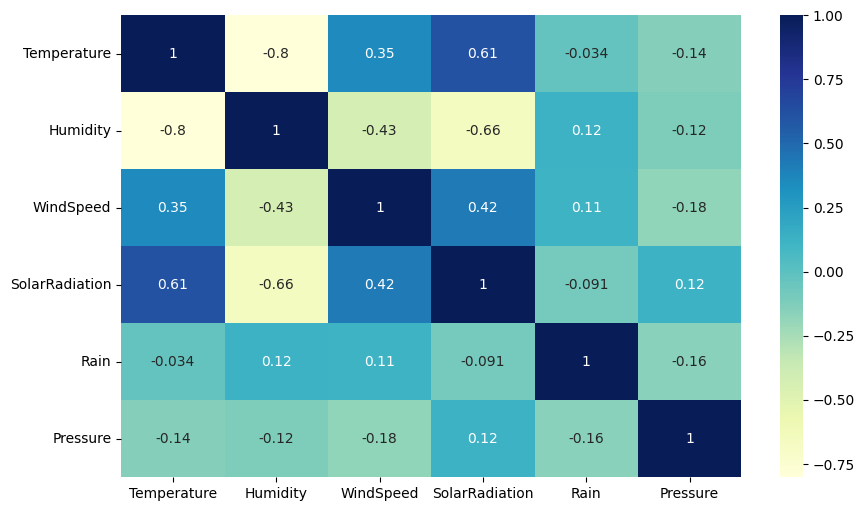

In [79]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_sample_data.corr(), annot=True, cmap='YlGnBu')

Najbardziej skorelowane wartości są pomiędzy SolarRadiation i Temperature

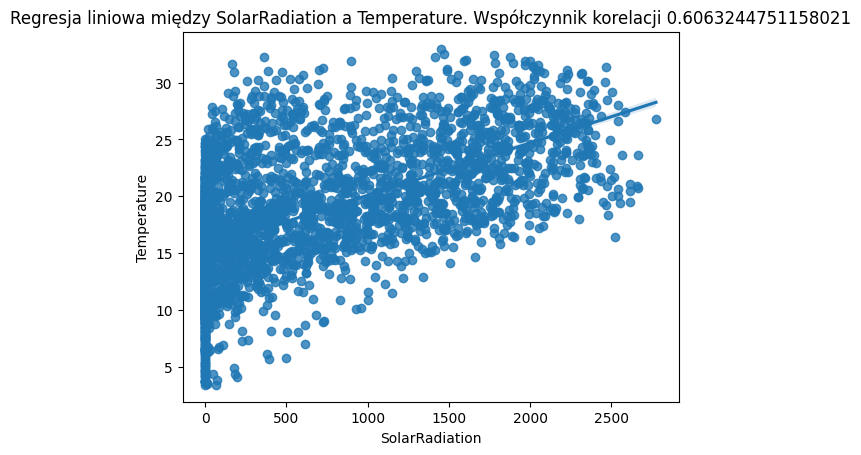

In [80]:
corr_coef = np.corrcoef(df_sample_data['SolarRadiation'], df_sample_data['Temperature'])[0,1]

sns.regplot(x=df_sample_data['SolarRadiation'], y=df_sample_data['Temperature'])
plt.xlabel('SolarRadiation')
plt.ylabel('Temperature')
plt.title(f"Regresja liniowa między {'SolarRadiation'} a {'Temperature'}. Współczynnik korelacji {corr_coef}")
plt.show()

<h5>3. Proszę użyć DataFrame utworzonego z pliku: "sample_data.csv". <br>
a) Obliczyć średnią dzienną temperaturę (dla każdego dnia w całym zbiorze danych), wynik przedstawić w formie tabelarycznej.<br>
    b) Narysować wykres słupkowy ilustrujący dzienną średnią temperaturę.
</h5>

In [81]:
mean_temp = df_sample_data.groupby(df_sample_data.index.date)['Temperature'].mean()
mean_temp

2020-07-07    15.240799
2020-07-08    14.019444
2020-07-09    16.456771
2020-07-10    21.240972
2020-07-11    14.719444
                ...    
2020-09-23    17.529687
2020-09-24    17.482465
2020-09-25    18.648611
2020-09-26    18.411458
2020-09-27    11.969333
Name: Temperature, Length: 83, dtype: float64

<Axes: >

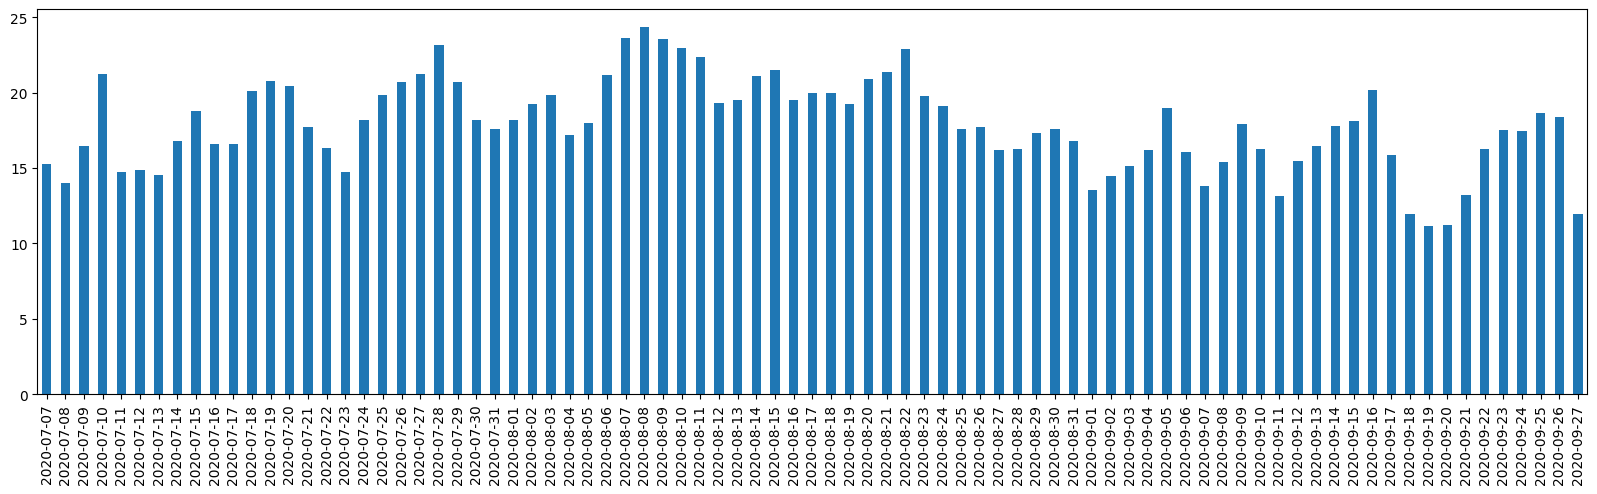

In [82]:
mean_temp.plot.bar(figsize=(20,5))

<h5>4. Wykorzystując DataFrame utworony z pliku: "sample_data.csv", proszę uzyskać informacje:<br>
    a) Jaki był sumaryczny opad w sierpniu? (atrybut "Rain")<br>
    b) Jak wiele deszczowych dni było w sierpniu? (rozróżnić dzień i noc na podstawie wartości "SolarRadiation", nocą przyjmuje ona wartość 0)<br>
    c) Jak wiele deszczowych nocy było w sierpniu?<br>
    d) Krórego dnia sierpnia deszcz padał najdłużej?<br>
</h5>

In [83]:
# sumaryczny opad w sierpniu

df_sample_data.loc['2020-08', 'Rain'].sum()

69.6

In [84]:
# deszczowych dni było w sierpniu

rainy_days = df_sample_data.loc['2020-08'][(df_sample_data['SolarRadiation'] == 1) & (df_sample_data['Rain'] > 0)]
rainy_days

<ipython-input-84-9a29a5d5f1ef>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rainy_days = df_sample_data.loc['2020-08'][(df_sample_data['SolarRadiation'] == 1) & (df_sample_data['Rain'] > 0)]


,Temperature,Humidity,WindSpeed,SolarRadiation,Rain,Pressure
DateTime,,,,,,
2020-08-03 20:00:00,18.233333,91.333333,2.000000,1,2.2,999.600000
2020-08-27 05:30:00,15.033333,92.000000,14.333333,1,0.2,994.433333
2020-08-30 05:30:00,15.166667,96.666667,3.000000,1,0.6,1000.500000


In [85]:
# deszczowych nocy było w sierpniu

rainy_nights = df_sample_data.loc['2020-08'][(df_sample_data['SolarRadiation'] == 0) & (df_sample_data['Rain'] > 0)]
rainy_nights_grouped = rainy_nights.groupby(rainy_nights.index.date).count()
rainy_nights_grouped

<ipython-input-85-6743cf747b13>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rainy_nights = df_sample_data.loc['2020-08'][(df_sample_data['SolarRadiation'] == 0) & (df_sample_data['Rain'] > 0)]


,Temperature,Humidity,WindSpeed,SolarRadiation,Rain,Pressure
2020-08-03,2,2,2,2,2,2
2020-08-04,1,1,1,1,1,1
2020-08-17,7,7,7,7,7,7
2020-08-18,1,1,1,1,1,1
2020-08-22,5,5,5,5,5,5
2020-08-27,3,3,3,3,3,3
2020-08-28,2,2,2,2,2,2
2020-08-30,12,12,12,12,12,12


In [86]:
rainy_nights_grouped.shape[0] # ilość wierszy = ilość deszczowych nocy

8

In [87]:
# Krórego dnia sierpnia deszcz padał najdłużej

rain_august = df_sample_data.loc['2020-08'][df_sample_data['Rain'] > 0]
rain_count = rain_august.groupby(rain_august.index.date)['Rain'].count()
rain_count[rain_count == rain_count.max()]

# 2020-08-30

<ipython-input-87-53e00857fcc8>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rain_august = df_sample_data.loc['2020-08'][df_sample_data['Rain'] > 0]


2020-08-30    16
Name: Rain, dtype: int64

<h5>5. Przyjmijmy, że w ramach badań wykonano pomiar współczynnika CRC (Canopy Reflection Coefficient). Wynik pomiaru został zapisany z częstotliwością 10 dni (jak pokazano w tabeli poniżej). Proszę połączyć dane z tej tabeli z danymi ze stacji meteorologicznej (sample_data.csv) w taki sposób, aby każdemu rekordowi została przypisana odpowiednia wartość współczynnika CRC (zależnie od dekady). Dekady należy ustalić zliczając dni następująco: pierwsza dekada: 1-10 dzień miesiąca, druga dekada: 11-20 dzień miesiąca, trzecia: 21-do ostatniego dnia miesiąca (lub końca danych). W przypadku gdy dla danej dekady brakuje wartości CRC należy przyjąć wartość domyślną CRC=0.23.</h5>
<table class="dataframe" border="1">
  <thead>
    <tr style="text-align: right;">
      <th>Month</th>
      <th>Decade</th>
      <th>CRC</th>
    </tr>
  </thead>
  <tbody>
    <tr>
        <th>7</th>
      <td>1</td>
      <td>1.2</td>
    </tr>
    <tr>
      <th>7</th>
      <td>2</td>
      <td>1.1</td>
    </tr>
    <tr>
      <th>7</th>
      <td>3</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>8</th>
      <td>1</td>
      <td>0.8</td>
    </tr>
    <tr>
      <th>8</th>
      <td>2</td>
      <td>0.6</td>
    </tr>
    <tr>
      <th>8</th>
      <td>3</td>
      <td>0.7</td>
    </tr>

  </tbody>
</table>
Przykładowy wynik powinien wyglądać następująco:<table class="dataframe" border="1">
<thead>
    <tr style="text-align: right;">
        <th></th>
<th>CRC</th>
        <th>DateTime</th>
        <th>Temperature</th>
<th>Humidity</th>
        <th>WindSpeed</th>
        <th>SolarRadiation</th>
<th>Rain</th>
        <th>Pressure</th>
    </tr>
    </thead>
    <tbody>
        <tr>
<th>0</th>
            <td>1.20</td>
            <td>2020-07-07 00:00:00</td>
<td>15.866667</td>
            <td>87.666667</td>
            <td>6.666667</td>
            <td>0</td>
            <td>0.0</td>
<td>1002.400000</td>
        </tr>
        <tr>
            <th>1</th>
            <td>1.20</td>
            <td>2020-07-07 00:30:00</td>
            <td>15.800000</td>
            <td>82.333333</td>
            <td>5.333333</td>
            <td>0</td>
            <td>0.0</td>
            <td>1002.400000</td>
        </tr>
        <tr>
            <th>2</th>
            <td>1.20</td>
<td>2020-07-07 01:00:00</td>
<td>15.066667</td>
<td>82.666667</td>
<td>3.333333</td>
<td>0</td>
<td>0.0</td>
<td>1001.633333</td>
</tr>
<tr>
<th>3</th>
<td>1.20</td>
<td>2020-07-07 01:30:00</td>
<td>15.000000</td>
<td>81.000000</td>
<td>6.000000</td>
<td>0</td>
<td>0.0</td>
<td>1002.133333</td>
</tr>
<tr>
<th>4</th>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
</tr>
</tbody>
</table>